<a href="https://colab.research.google.com/github/fernandonetom/curso-python-e-octave/blob/master/Aula_02_Fernando_Martins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 02

## Preparação

Para começar, vamos montar o Google Drive. 

Desejo ler e escrever no Drive de modo que os arquivos não se percam quando esse jupyter-notebook for fechado.

Também vamos colocar aqui todos os 'import' necessários. É usual importar uma única vez para deixar todas as rotinas que serão usadas disponíveis.

In [0]:
# Montando o drive
from google.colab import drive
drive.mount('/content/drive')

# Mostrar imagens
from IPython.display import Image

# Interatividade
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed

# Pacote numérico
import numpy as np

# Plot
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'grid.linestyle': ':',
}
plt.rcParams.update(params)
%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Advertência

As análises apresentadas aqui são válidas para o chamado **'regime permanente'**.

## Objetivos de hoje

O tema de hoje são os **Circuitos Monofásicos**, mas nossos objetivos vão além...

* Apresentar os recursos do Jupyter Notebook

>Algumas coisas legais que podem ser feitas com Markdown e mais importante, a integração entre texto e simulação computacional.

* Apresentar várias funções importantes para hoje e para os próximos encontros

>Funções do Python e dos pacotes NumPy e Matplotlib.

* Apresentar uma abordagem voltada ao ensino com simulação

>A proposta é convencê-los de que 'simulação' mais 'análises de sensibilidade' são recursos valiosos.

* O que mais? 

<hr>

**No final me lembrem de rever se atendemos aos objetivos propostos.**

## O que são circuitos elétricos monofásicos?

*Um circuito monofásico é um circuito que é constituído apenas de uma fase elétrica e um neutro, devendo também possuir um condutor de eqüipotencialização chamado de 'terra' (https://pt.wikipedia.org/wiki/Circuito_monof%C3%A1sico).*

<hr>

<hr>

Quando você liga um equipamento na tomada da sua casa, está ligando o equipamento em um circuito monofásico. 

Se a tomada usa o padrão 'novo', os três pinos são Fase - Terra - Neutro. 

Podemos pensar que existe uma fonte de energia fora das nossas casas e nós acessamos essa energia ligando equipamentos entre os condutores de fase e neutro. 

Conforme mostrado na figura a seguir.

In [0]:
Image('/content/drive/My Drive/Ciclo de Palestras/Aula 01/Exemplo_tomada_3pinos.PNG',width=600)

**Conclusão**

Você lida diariamente com circuitos monofásicos sempre que liga um equipamento elétrico na sua casa ou trabalho!

## Para que servem os circuitos elétricos monofásicos?

O interesse é sempre obter **energia** para nosso conforto. Alguns exemplos do que desejamos:

* Calor
* Frio
* Som
* Luz
* Processamento computacional
* etc...

A energia precisa estar disponível, com fácil acesso e na quantidade desejada.

Essa sede por energia não se restringe a eletricidade. O fogão por exemplo atende a uma demanda específica por calor!

## Qual a definição de energia?

De acordo com https://michaelis.uol.com.br/moderno-portugues/busca/portugues-brasileiro/energia:

energia

**1. Fís Capacidade que um corpo, um sistema de corpos ou uma substância têm de realizar trabalho, entendendo-se por trabalho a deslocação do ponto de aplicação de uma força. Símbolo: E.**
2. Modo como se exerce uma força; ação, eficácia, eficiência.
3. fig Qualidade do que é enérgico; resolução nos atos; dinamismo, fibra, firmeza.
4. fig Força física; potência, vigor.
5. fig Arrojo, destemor e ousadia de concepção e realização. 

<hr>

<hr>

Se desejo calor: 
* Preciso de X Joules (J) de energia para aquecer a panela de feijão de 20°C para 50°C;

Se desejo frio: 
* Preciso de Y Joules (J) de energia para resfriar o quarto de 30°C para 24°C.

Observe que X e Y não dependem do tempo. 

O natural é perguntar:

>**Quanto tempo leva para realizar essa tarefa?**

Para responder essa pergunta, precisamos de outra definição: 

**Potência**!


## Qual a definição de potência?

De acordo com https://michaelis.uol.com.br/moderno-portugues/busca/portugues-brasileiro/pot%C3%AAncia/:

potência

1. Qualidade do que é potente, forte ou poderoso: “Depois das estreias, uma peça perde muito da sua potência. A presença do público, isto é, a presença de duzentas senhoras comedoras de pipocas compromete o mistério, o sortilégio e a sabedoria de um texto” (NR).
2. Força física capaz de mover algo.
3. Grande disposição para o sexo: “Tu sabes o que quero dizer, tu mesmo confirmaste a fama que tenho de femeeiro. – Vixessantíssima, ioiô, nem me fale! Aqui em Nazaré, diz o povo… Ih-ih! – Deixa de troças, há muito exagero. De fato, às vezes penso que existe em mim como que um impulso viril descomedido, uma potência…” (JU).
4. Poder de decidir, de se fazer obedecer.
5. Aptidão inata para produzir: “Pode haver, aqui e ali, um ou outro caso de debilidade mental cristalina. A maioria, porém, se o quisesse, teria talento, teria imaginação, teria originalidade, teria uma enorme potência criadora. Mas sacrifica todas essas virtudes nobres e uma pose política, socialista, marxista ou que outro nome tenha” (NR).
6. Nação que demonstra sua independência econômica e soberania militar: “[…] todos esses fatores formavam um cenário que obrigava a um estado de alerta, de emergência mesmo, cada potência procurando adivinhar o poderio, as ligações e as intenções dos possíveis adversários” (CA).
7. Máximo alcance da emissão de um som por um aparelho, instrumento, pela voz humana etc.: “Hoje encontro a porta encostada, o quarto escuro, e arrependo-me um pouco de ter entrado. Os metais da orquestra chegam cá em cima com toda a potência, mas estou certo de ter ouvido um suspiro, um suspiro de voz conhecida” (CB).
8. O rendimento de uma máquina.
9. Fís O inverso da distância do foco de uma lente, medida por meio de dioptrias; convergência, vergência.
**10. Fís Grandeza que define a quantidade de energia de uma fonte a cada unidade de tempo.**
11. Fís Quociente do trabalho realizado por uma força e o tempo gasto para realizá-lo.
12. Mat O número cardinal de um conjunto; possança.
13. Mat Quantidade de vezes que um número ocorre, indicado por um expoente, como fator numa operação de potenciação.
14. Mat O resultado da operação de potenciação.
15. Geom Quociente constante das distâncias de um ponto fixo às intersecções de uma reta, com uma circunferência passando por esse ponto.
16. Filos O que contém a possibilidade de vir a ser.
17. Filos Conjunto de elementos internos e externos que podem promover mudanças num ser.
18. fig Pessoa que se destaca por sua importância, pela influência que exerce.

<hr>

<hr>

Potência é a taxa em que a energia é gerada ou consumida, medida em Watts (W). Em que: 1 W = 1 J/s.

Por exemplo, considere o exemplo do fogão:

>Preciso de X Joules (J) de energia para aquecer a panela de feijão de 20°C para 50°C;

Se X = 1000 J:

* Exemplo 1

>Em fogo baixo, o fogão entrega a panela 5 J/s = 5 W. Logo, são necessários 200 segundos para cumprir a tarefa, pois 5 J/s * 200 s = 1000 J.

* Exemplo 2

>Em fogo alto, o fogão entrega a panela 10 J/s = 10 W. Logo, são necessários 100 segundos para cumprir a tarefa, pois 10 J/s * 100 s = 1000 J.

O conceito é parecido com velocidade. Nesse caso, **a velocidade com que a energia é entregue ou consumida**.

## Falamos em energia térmica, com energia elétrica é diferente?

Não.

O conceito é rigorosamente o mesmo, porém a unidade utilizada é diferente.

Nas nossas residências, o usual é medir a energia em kWh. Isto é:

\begin{equation}
1 kWh = 1000 W * 1 h = 1000 W * 3600 s = 3.6 MJ
\end{equation}

Observe que 1 J significa 'pouca' energia. Usar kWh permite consumos mais fáceis de entender... 

Por exemplo, imagine uma residência em que o consumo mensal é de 300 kWh. Caso a conta viesse em J, seriam 1.08 GJ!

## Falamos em potência térmica, com potência elétrica é diferente?

Não.

Retomando o exemplo do fogão em fogo baixo, temos a chama entregando 5 W = 5 J/s. 

Um exemplo elétrico equivalente seria de uma lanterna de pilhas:

>Se a potência da lâmpada é de 12 W, significa que 12 Joules são convertidos em luz a cada segundo quando ela está ligada.

## Que tal simular potência e energia?

Desejamos desenhar gráficos da potência ao longo do tempo e da energia resultante.

*O exemplo fisicamente é muito simples, mas a proposta é focar nas funções utilizadas.*

### Etapa 1 - Definir os parâmetros de entrada

Os parâmetros são:

* $P$ Potência fornecida, em W;
* $T$ Tempo total da simulação, em s;
* $fa$ Frequência de amostragem, em Hertz.

>Todos lembram o conceito de frequência?

>E período?

In [0]:
# Potência, em W
P = 12
# Tempo da simulação, em s
T = 2
# Frequência de amostragem, em Hz
fa = 60

### Etapa 2 - Gerando as séries temporais

Utilizamos funções básicas do Python e a biblioteca **numpy**:

* np.arange
* np.array
* list comprehension
* np.zeros
* len
* for
* range

In [0]:
Ta = 1/fa

t = np.arange(0, T, Ta)
pt = np.array([P for item in t])

et = np.zeros((len(pt),1))
for i in range(1,len(pt)):
  et[i] = et[i-1] + pt[i-1] * Ta

In [0]:
# Caixa de Areia
et.shape

(120, 1)

### Etapa 3 - Plotando

Utilizamos funções da biblioteca **matplotlib**:

* subplots
* plot
* set_xlabel
* set_ylabel
* legend
* grid

E também a função np.mean do numpy.

Também aparece aqui o chamado 'f-string'.

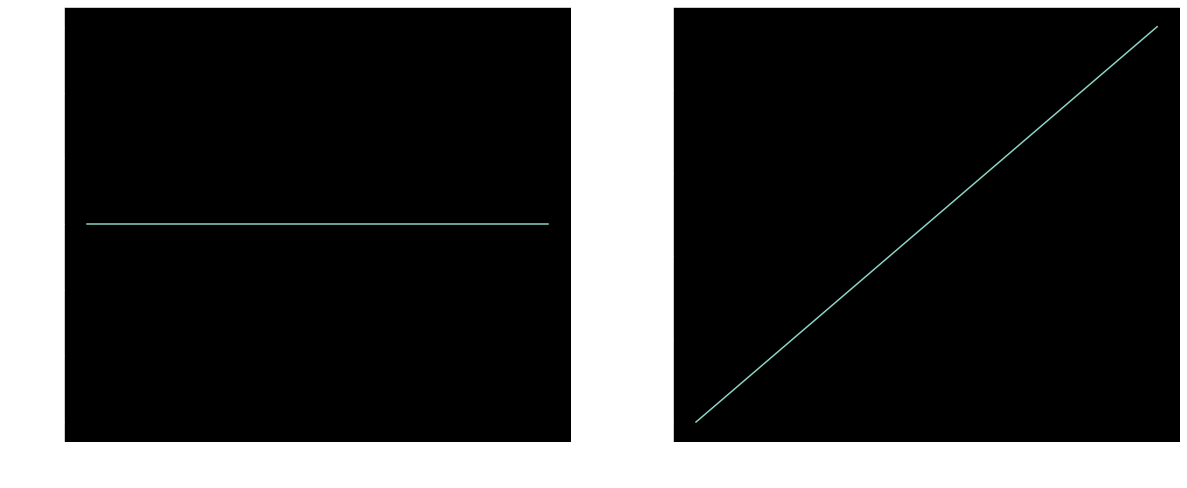

In [0]:
# Plots - Versão 1

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))

ax1.plot(t, pt)
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Potência (W)')

ax2.plot(t, et)
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Energia (J)')

fig.show()

#### Melhorando os plots... Perfumaria.

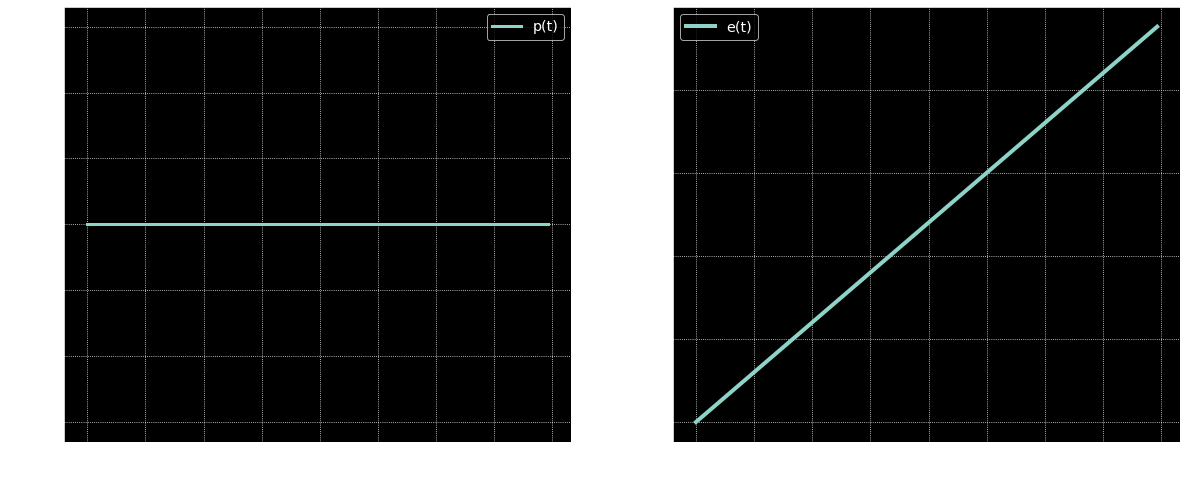

In [0]:
# Plots - Versão 2

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))

ax1.plot(t, pt, linewidth=3, linestyle='-', label='p(t)')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel(f'Potência (W) - Média = {np.mean(pt):6.4f} W')
ax1.legend(loc='best')
ax1.grid(True)

ax2.plot(t, et, linewidth=4, linestyle='-', label='e(t)')
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel(f'Energia (J)')
ax2.legend(loc='best')
ax2.grid(True)

In [0]:
# Caixa de areia
a = 123.456
print(f'Potência (W) - Média = {a:8.6f} W')
# ............
#   123.456000

Potência (W) - Média = 123.456000 W


### Resultado

Conforme esperado, após 2 segundos a fonte de 12 W entregou 24 J!

### Podemos melhorar esse código? Sim. Funções.

In [0]:
def calcula_et(pt,dt):
  '''
  Calcula a energia entregue usando o método retângular.
  '''
  et = np.zeros((len(pt),1))
  for i in range(1,len(pt)):
    et[i] = et[i-1] + pt[i-1] * dt

  return et

In [0]:
def gera_t_pt_et(P,T,fa):
  '''
  Calcula as séries temporais: t,pt,et
  Potência constante P (W)
  Duração T (s)
  Frequência de Amostragem fa (Hz)
  '''

  t = np.arange(0, T, 1/fa)
  pt = np.array([P for item in t])
  et = calcula_et(pt,1/fa)

  return t,pt,et

In [0]:
def plot_serie_temporal(ax,x,y,legenda = '',xlabel = '',ylabel = ''):
  '''
  Plota uma série temporal em ax.
  '''

  ax.plot(x, y, linewidth=3, linestyle='-', label=legenda)
  ax.grid(True)

  if(len(xlabel) > 0):
    ax.set_xlabel(xlabel)
  if(len(ylabel) > 0):
    ax.set_ylabel(ylabel)
  if(len(legenda) > 0):
    ax.legend(loc='best')

  return ax

O código agora tem 9 linhas;

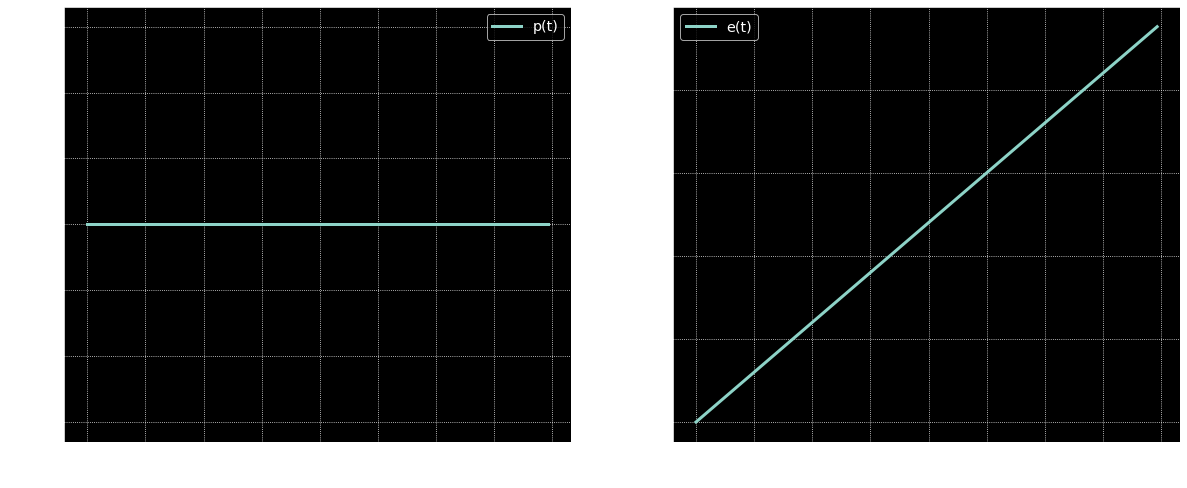

In [0]:
# Parâmetros de Entrada
P = 12
T = 2
fa = 60

# Processamento
t,pt,et = gera_t_pt_et(P,T,fa)

# Resultados
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))
ax1 = plot_serie_temporal(ax1,t,pt,'p(t)','Tempo (s)',f'Potência (W) - Média = {np.mean(pt):6.4f} W')
ax2 = plot_serie_temporal(ax2,t,et,'e(t)','Tempo (s)','Energia (J)')

## Exercício 1

Plote os gráficos da potência e energia para uma duração de 5 s, com frequência de amostragem de 60 Hz e sabendo que a fonte é do tipo:

\begin{equation}
p(t) = P*t
\end{equation}

E assumindo P = 12 W.

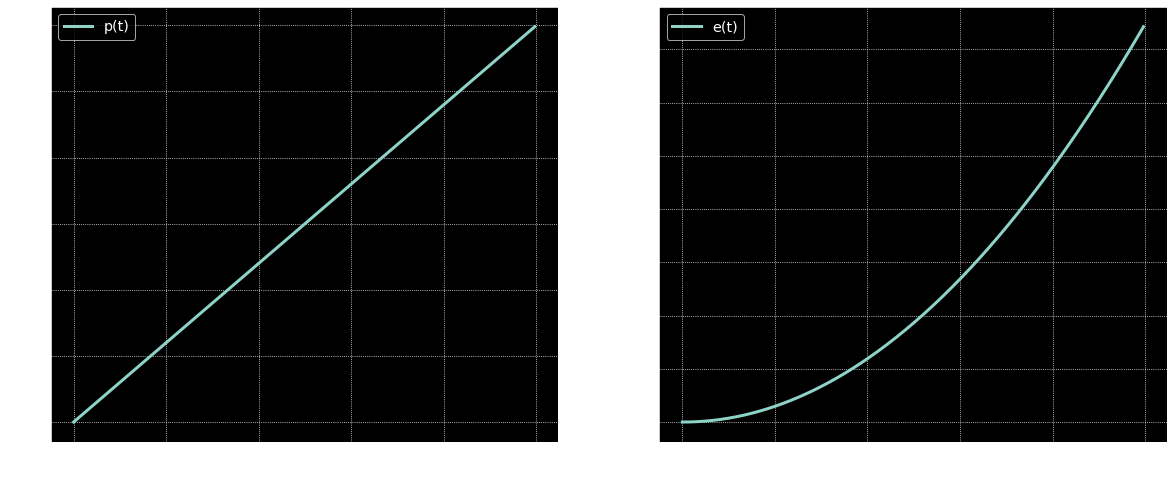

In [0]:
# Resposta

# Parâmetros de Entrada
P = 12
T = 5
fa = 60

# Processamento
Ta = 1/fa
t = np.arange(0, T, Ta)
pt = np.array([P*x for x in t])
et = calcula_et(pt,Ta)

# Resultados
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))
ax1 = plot_serie_temporal(ax1,t,pt,'p(t)','Tempo (s)',f'Potência (W) - Média = {np.mean(pt):6.4f} W')
ax2 = plot_serie_temporal(ax2,t,et,'e(t)','Tempo (s)','Energia (J)')

## Tensão, Corrente e Potência

Até aqui, falamos somente em energia e potência. 

Para que se tenha energia, é preciso que haja potência.

E para que haja potência elétrica, é preciso que se tenha **tensão** e **corrente**. 

Tensões são medidas em Volts (V) e correntes são medidas em Àmperes (A).

### Um equivalente hidráulico

No livro **Introdução à Teoria de Sistemas de Energia Elétrica**, de Olle I. Elgerd, é feita uma equivalência entre um circuito elétrico e um circuito hidráulico:

* Os **fios** do circuito elétrico equivalem aos **canos** do sistema hidráulico;
* A **tensão** é vista como a **pressão** existente nos canos. 

Observe que pode haver pressão sem derramar uma única gota de água. 

Apenas quando uma torneira é aberta, o sistema cumpre sua função de distribuir água. Nesse caso:

* A **corrente** elétrica é equivalente a **vazão** de água.


### Conceito de potência elétrica

As grandezas descritas são series temporais:

* $v(t)$ é a tensão ao longo do tempo t, em V;
* $i(t)$ é a corrente ao longo do tempo t, em A;
* $p(t)$ é a potência ao longo do tempo t, em W;

Por definição:

\begin{equation}
p(t) = v(t)*i(t)
\end{equation}

Fica evidente agora a dependência da potência de $v(t)$ e $i(t)$, pois basta que uma dessas grandezas seja nula para anular a potência.

Também observe que 1 W = 1 V * 1 A.

Vamos testar essas equações...

## Que tal simular o exemplo da lanterna de pilhas com Tensão e Corrente?

O objetivo é simular novamente a lanterna.

Os parâmetros são:

* $V$ Tensão fornecida, em V;
* $I$ Corrente fornecida, em A;
* $T$ Tempo total da simulação, em s;
* $fa$ Frequência de amostragem, em Hertz.

Desejamos visualizar tensões, correntes; potência; e energia. 

Vamos adotar a mesma estratégia de antes, baseada em funções...

In [0]:
# def calcula_et(pt,dt):
#   '''
#   Calcula a energia entregue usando o método retângular.
#   '''
#   et = np.zeros((len(pt),1))
#   for i in range(1,len(pt)):
#     et[i] = et[i-1] + pt[i-1] * dt

#   return et

In [0]:
def gera_t_vt_it_pt_et(V,I,T,fa):
  '''
  Calcula as séries temporais: t,vt,it,pt,et
  Tensão constante V (V)
  Corrente constante I (A)
  Duração T (s)
  Frequência de Amostragem fa (Hz)
  '''

  Ta = 1/fa
  t = np.arange(0, T, Ta)
  vt = np.array([V for item in t])
  it = np.array([I for item in t])
  pt = np.array([V*I for item in t])
  et = calcula_et(pt,Ta)

  return t,vt,it,pt,et

In [0]:
# def plot_serie_temporal(ax,x,y,legenda = '',xlabel = '',ylabel = ''):
#   '''
#   Plota uma série temporal em ax.
#   '''

#   ax.plot(x, y, linewidth=3, linestyle='-', label=legenda)
#   ax.grid(True)

#   if(len(xlabel) > 0):
#     ax.set_xlabel(xlabel)
#   if(len(ylabel) > 0):
#     ax.set_ylabel(ylabel)
#   if(len(legenda) > 0):
#     ax.legend(loc='best')

#   return ax

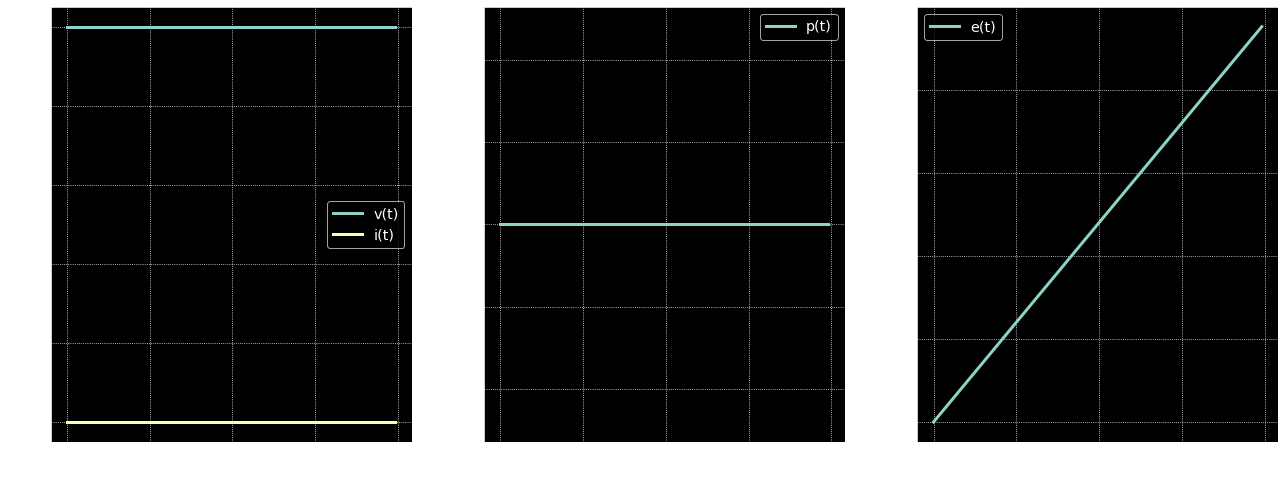

In [0]:
# Parâmetros de Entrada
V = 12
I = 2
T = 2
fa = 60

# Processamento
t,vt,it,pt,et = gera_t_vt_it_pt_et(V,I,T,fa)

# Resultados
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22, 8))

ax1 = plot_serie_temporal(ax1,t,vt,'v(t)','Tempo (s)','Tensão (V) e Corrente (A)')
ax1 = plot_serie_temporal(ax1,t,it,'i(t)','','')

ax2 = plot_serie_temporal(ax2,t,pt,'p(t)','Tempo (s)',f'Potência (W) - Média = {np.mean(pt):6.4f} W')

ax3 = plot_serie_temporal(ax3,t,et,'e(t)','Tempo (s)','Energia (J)')

## Podemos melhorar esse código? Sim. Interact!

Uma versão melhor desse código do ponto de vista de simulação pode ser obtida utilizando um recurso do Jupyter chamado 'interact'.

OBS: Lembre de testar o que ocorre quando $v$ ou $i$ são nulas.

In [0]:
T = 2
fa = 60

@interact_manual
def interact_plot_vt_it_pt_et(T=fixed(T),fa=fixed(fa),V=(0, 15, 1),I=(0, 15, 1)):

  t,vt,it,pt,et = gera_t_vt_it_pt_et(V,I,T,fa)

  fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22, 8))

  ax1 = plot_serie_temporal(ax1,t,vt,'v(t)','Tempo (s)','Tensão (V) e Corrente (A)')
  ax1 = plot_serie_temporal(ax1,t,it,'i(t)','','')

  ax2 = plot_serie_temporal(ax2,t,pt,'p(t)','Tempo (s)',f'Potência (W) - Média = {np.mean(pt):6.4f} W')
  ax3 = plot_serie_temporal(ax3,t,et,'e(t)','Tempo (s)','Energia (J)')

interactive(children=(IntSlider(value=7, description='V', max=15), IntSlider(value=7, description='I', max=15)…

## Definição de Sistemas de Corrente Contínua (CC)

Nos exemplos anteriores, V e I foram sempre tomadas como valores conhecidos. Mais que isso, foram tomadas como valores conhecidos e constantes ao longo do tempo. Sistemas desse tipo são nomeados de **Corrente Contínua (CC)**!

### Relação entre $v$ e $i$ em sistemas CC

Cada equipamento possui uma característica intrínsica que relaciona a tensão $v$ que ele é submetido e a corrente $i$ que vai percorrê-lo.

Em sistemas CC, esse valor é um número **real** nomeado de **Resistência (R)**. Sua unidade é 'Ohms'.

Desse modo, quando simulamos a lanterna com V = 12 V e I = 1 A:

\begin{equation}
R = \frac{V}{I} = \frac{12}{1} = 12 \;ohms
\end{equation}

Essas três grandezas tem uma relação de dependência, de modo que se soubermos duas, imediatamente podemos determinar a terceira. Por exemplo, se V = 6 V e R = 12 ohms: I = 0.5 A.

### Quer dizer que se eu fizer V = 220 V e R = 11 Ohms, posso simular o chuveiro elétrico de 4400 W da minha casa?

Não.

Do ponto de vista matemático, supondo que se trata de um sistema CC:

\begin{align}
I & = \frac{V}{R} = \frac{220}{11} = 20 \;A \\
P & = VI = 220*20 = 4400 \;W
\end{align}

A potência consumida seria a desejada...

Entretanto, nas nossas casas o sistema utilizado é de **Corrente Alternada (CA)**.

## Guerra das Correntes: CC versus CA

Não vamos discutir o porquê do sistema da nossa casa ser CA e não CC. 

Essa discussão ficou para um próximo encontro, cujo tema é **Potência Trifásica**!

Para aqueles que tiverem curiosidade:

Documentário:
>https://www.youtube.com/watch?v=3Ma2HLZjbIA

Filme:
>https://www.youtube.com/watch?v=qZ0uu0DDttw

## Tensão, Corrente e Potência CA

Novamente, as grandezas descritas são series temporais:

* $v(t)$ é a tensão ao longo do tempo t, em V;
* $i(t)$ é a corrente ao longo do tempo t, em A;
* $p(t)$ é a potência ao longo do tempo t, em W;

Em que, continua valendo:

\begin{equation}
p(t) = v(t)*i(t)
\end{equation}

Contudo, as grandezas $v$ e $i$ variam ao longo do tempo, logo $p$ também varia. 

Do ponto de vista matemático:

\begin{align}
v(t) & = &V_m\sin(\omega t + \theta_v) \\
i(t) & = &I_m\sin(\omega t + \theta_i) \\
\end{align}


## Relação entre $v$ e $i$ em sistemas CA: O conceito de Impedância (Z)

Como dito antes, cada equipamento possui uma característica intrínsica que relaciona a tensão $v$ que ele é submetido com a corrente $i$ que vai percorrê-lo.

Em sistemas CA, esse valor é um número **complexo** nomeado de **Impedância (Z)**. Sua unidade é 'Ohms', sendo definido como:

\begin{equation}
\hat{Z} = |Z| \angle \theta
\end{equation}

Parecido com o que foi visto antes para sistemas CC, existe uma relação entre $V_m$, $I_m$ e |Z|:

\begin{equation}
|Z| = \frac{V_m}{I_m}
\end{equation}

O curioso é que também há uma relação matemática entre $\theta_v$, $\theta_i$ e $\theta$:

\begin{equation}
\theta = \theta_v - \theta_i
\end{equation}

Desse modo, |Z| estabelece uma relação entre as amplitudes de $v(t)$ e $i(t)$, enquanto $\theta$ estabelece uma relação entre as fases de $v(t)$ e $i(t)$.

### Impedância Puramente Resistiva

Uma impedância puramente resistiva é aquela em que $|Z|$ é não nulo e $\theta$ = 0°.

Logo:

\begin{equation}
\theta_v - \theta_i = 0°
\end{equation}

### Impedância Puramente Indutiva

Uma impedância puramente indutiva é aquela em que $|Z|$ é não nulo e $\theta$ = 90°.

Logo:

\begin{equation}
\theta_v - \theta_i = 90°
\end{equation}

### Impedância Puramente Capacitiva

Uma impedância puramente capacitiva é aquela em que $|Z|$ é não nulo e $\theta$ = -90°.

Logo:

\begin{equation}
\theta_v - \theta_i = -90°
\end{equation}

### Impedâncias Reais

Equipamentos reais necessariamente possuem resistência. 

Existem equipamentos do tipo **Impedância puramente resistiva** e existem equipamentos com **Impedância mista**, que podem ser:

* resistivo-indutivo

>Nesse caso, $|Z|$ é não nulo e $\theta$ = ]0°, 90°[.

* resistivo-capacitivo

>Nesse caso, $|Z|$ é não nulo e $\theta$ = ]-90°, 0°[.

## Que tal simular um equipamento genérico CA?

Os parâmetros são:

* $V_m$ A amplitude da tensão fornecida, em V;
* $\theta_v$ A fase da tensão fornecida, em °;
* $I_m$ A amplitude da corrente fornecida, em A;
* $\theta_i$ A fase da corrente fornecida, em °;
* $T$ Tempo total da simulação, em s;
* $fa$ Frequência de amostragem, em Hertz.

Desejamos visualizar tensões, correntes; potência; e energia. 

Vamos adotar a mesma estratégia de antes, baseada em funções...

In [0]:
# def calcula_et(pt,dt):
#   '''
#   Calcula a energia entregue usando o método retângular.
#   '''
#   et = np.zeros((len(pt),1))
#   for i in range(1,len(pt)):
#     et[i] = et[i-1] + pt[i-1] * dt

#   return et

In [0]:
def gera_t_vt_it_pt_et_CA(Vm,theta_v,Im,theta_i,T,fa):
  '''
  Calcula as séries temporais: t,vt,it,pt,et
  Tensão CA com Vm e theta_m (V)
  Corrente CA com Im e theta_i (A)
  Duração T (s)
  Frequência de Amostragem fa (Hz)
  '''

  Ta = 1/fa
  t = np.arange(0, T, Ta)
  w = 2*np.pi*60
  vt = np.array([Vm*np.sin(w*item + theta_v*np.pi/180) for item in t])
  it = np.array([Im*np.sin(w*item + theta_i*np.pi/180) for item in t])
  pt = vt*it
  et = calcula_et(pt,Ta)

  return t,vt,it,pt,et

In [0]:
# def plot_serie_temporal(ax,x,y,legenda = '',xlabel = '',ylabel = ''):
#   '''
#   Plota uma série temporal em ax.
#   '''

#   ax.plot(x, y, linewidth=3, linestyle='-', label=legenda)
#   ax.grid(True)

#   if(len(xlabel) > 0):
#     ax.set_xlabel(xlabel)
#   if(len(ylabel) > 0):
#     ax.set_ylabel(ylabel)
#   if(len(legenda) > 0):
#     ax.legend(loc='best')

#   return ax

Considere uma carga genérica sendo percorrida por uma corrente CA com $I_m = 3 A$ e $\theta_i = -30°$, enquanto a tensão aplicada em seus terminais é $V_m = 2 V$ com $\theta_v = 15°$. 

Considere que as grandezas foram amostradas ao longo de 50 ms com uma frequência de 2400 Hz.

Antes de partir para a simulação... 
* Essa carga é de que tipo? 
* Quanto vale |Z|? 
* Quanto vale $\theta$?

Lembrar de brincar de alterar esses valores...

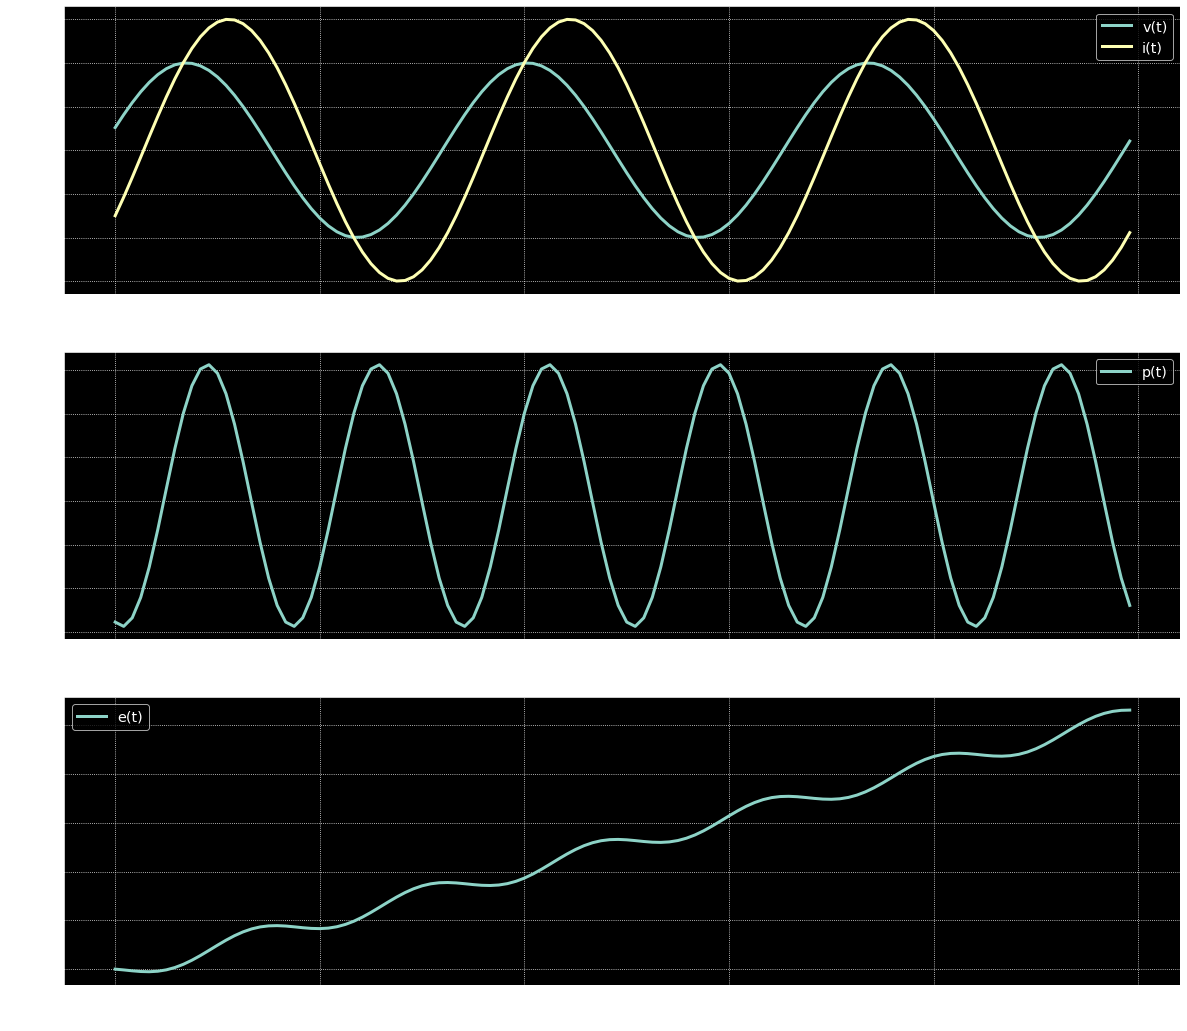

In [0]:
Vm = 2
theta_v = 15
Im = 3
theta_i = -30
T = 0.050
fa = 2400

t,vt,it,pt,et = gera_t_vt_it_pt_et_CA(Vm,theta_v,Im,theta_i,T,fa)

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20, 18))

ax1 = plot_serie_temporal(ax1,t,vt,'v(t)','Tempo (s)','Tensão (V) e Corrente (A)')
ax1 = plot_serie_temporal(ax1,t,it,'i(t)','','')

ax2 = plot_serie_temporal(ax2,t,pt,'p(t)','Tempo (s)',f'Potência (W) - Média = {np.mean(pt):6.4f} W')

ax3 = plot_serie_temporal(ax3,t,et,'e(t)','Tempo (s)','Energia (J)')

### Vamos fazer a versão "Interact"?

Sim.

Mas dessa vez vamos fornecer a impedância do equipamento e a tensão.

Os parâmetros são:

* $V_m$ A amplitude da tensão fornecida, em V;
* $\theta_v$ A fase da tensão fornecida, em °;
* $|Z|$ A amplitude da impedância fornecida, em Ohms;
* $\theta$ A fase da impedância fornecida, em °;
* $T$ Tempo total da simulação, em s;
* $fa$ Frequência de amostragem, em Hertz.

Desejamos visualizar tensões, correntes; potência; e energia. 


In [0]:
T = 0.050
fa = 2400

@interact_manual
def interact_plot_vt_it_pt_et_CA(T=fixed(T)
                                ,fa=fixed(fa)
                                ,Vm=(0, 15, 1)
                                ,theta_v=(-90, 90, 30)
                                ,Z=(0, 15, 1)
                                ,theta=(-90, 90, 30)):
  Im = Vm / Z
  theta_i = theta_v - theta

  t,vt,it,pt,et = gera_t_vt_it_pt_et_CA(Vm,theta_v,Im,theta_i,T,fa)

  fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20, 18))

  ax1 = plot_serie_temporal(ax1,t,vt,'v(t)','Tempo (s)','Tensão (V) e Corrente (A)')
  ax1 = plot_serie_temporal(ax1,t,it,'i(t)','','')

  ax2 = plot_serie_temporal(ax2,t,pt,'p(t)','Tempo (s)',f'Potência (W) - Média = {np.mean(pt):6.4f} W')

  ax3 = plot_serie_temporal(ax3,t,et,'e(t)','Tempo (s)','Energia (J)')

interactive(children=(IntSlider(value=7, description='Vm', max=15), IntSlider(value=0, description='theta_v', …

## Exercício 2

Considere que a tensão aplicada nos terminais de uma carga genérica com |Z| = 11 Ohms seja $V_m$ = 311 V com $\theta_v$ = 0°. Plote no mesmo gráfico as curvas de potência $p(t)$ para $\theta$ = 0°, 30°, 60°, 90°

Considere que as grandezas foram amostradas ao longo de 50 ms com uma frequência de 2400 Hz.

### Resposta

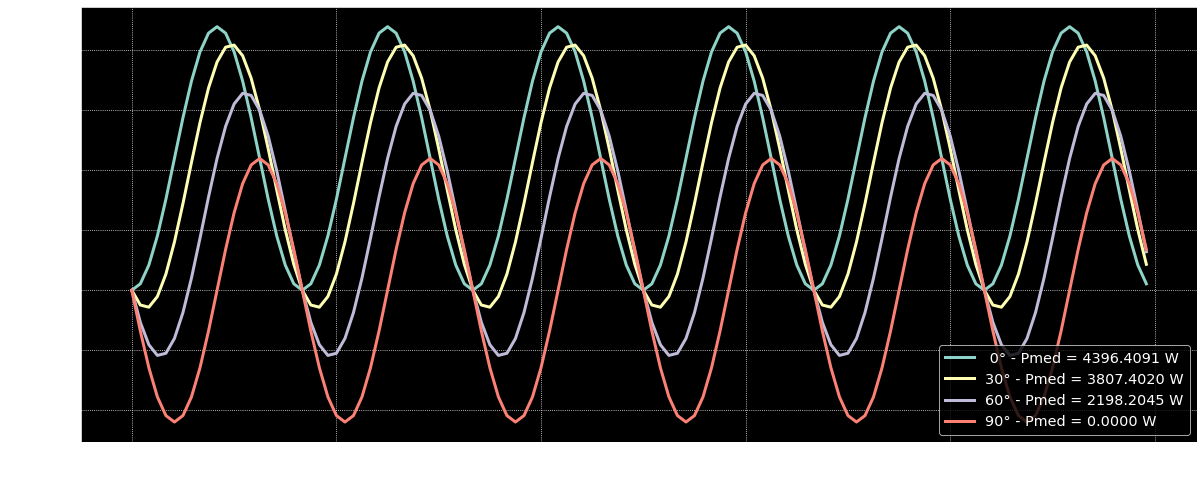

In [0]:
# Resposta

Vm = 311
theta_v = 0
Z = 11
thetas = [0, 30, 60, 90]
Im = Vm / Z
T = 0.050
fa = 2400

fig, ax = plt.subplots(1,1,figsize=(20, 8))
for theta in thetas:
  theta_i = theta_v - theta
  t,vt,it,pt,et = gera_t_vt_it_pt_et_CA(Vm,theta_v,Im,theta_i,T,fa)
  legenda = f'{theta:2d}° - Pmed = {np.mean(pt):6.4f} W'
  ax = plot_serie_temporal(ax,t,pt,legenda,'Tempo (s)','Potência (W)')

Observe que a potência máxima é 4396.41 W. Esse exemplo reproduz o chuveiro elétrico de 4400 W.

## Impedâncias Reais: $p_R$ e $p_X$

Considere um equipamento genérico cuja impedância tem partes resistiva e indutiva/capacitiva. 

Como vimos, para esse equipamento:

* $|Z|$ é não nulo e 
* $-90° < \theta < 90°$.

Adotando o artifício matemático de separar a parte resistiva da parte indutiva/capacitiva, como se fossem 2 equipamentos ligados na tomada ao invés de 1, podemos escrever a equação da potência $p(t)$ como mostrado a seguir:

\begin{equation}
p(t) = v(t)*i(t) = p_R(t) + p_X(t)
\end{equation}

Sendo:

\begin{align}
p_R(t) & = \frac{V_mI_m\cos(\theta)}{2}(1 - \cos(2\omega t + 2 \theta_v)) \\
p_X(t) & = \frac{V_mI_m\sin(\theta)}{2}(- \cos(2\omega t + 2 \theta_v - 90°))
\end{align}

**Qual a vantagem?**

Vamos simular o comportamento dessas parcelas quando variamos $\theta$.

## Que tal simular um equipamento genérico CA com $p_R(t)$ e $p_X(t)$

Os parâmetros são:

* $V_m$ A amplitude da tensão fornecida, em V;
* $\theta_v$ A fase da tensão fornecida, em °;
* $I_m$ A amplitude da corrente fornecida, em A;
* $\theta_i$ A fase da corrente fornecida, em °;
* $T$ Tempo total da simulação, em s;
* $fa$ Frequência de amostragem, em Hertz.

Desejamos visualizar $p(t)$, $p_R(t)$ e $p_X(t)$). 

In [0]:
# def calcula_et(pt,dt):
#   '''
#   Calcula a energia entregue usando o método retângular.
#   '''
#   et = np.zeros((len(pt),1))
#   for i in range(1,len(pt)):
#     et[i] = et[i-1] + pt[i-1] * dt

#   return et

In [0]:
# def gera_t_vt_it_pt_et_CA(Vm,theta_v,Im,theta_i,T,fa):
#   '''
#   Calcula as séries temporais: t,vt,it,pt,et
#   Tensão CA com Vm e theta_m (V)
#   Corrente CA com Im e theta_i (A)
#   Duração T (s)
#   Frequência de Amostragem fa (Hz)
#   '''

#   Ta = 1/fa
#   t = np.arange(0, T, Ta)
#   w = 2*np.pi*60
#   vt = np.array([Vm*np.sin(w*item + theta_v*np.pi/180) for item in t])
#   it = np.array([Im*np.sin(w*item + theta_i*np.pi/180) for item in t])
#   pt = vt*it
#   et = calcula_et(pt,Ta)

#   return t,vt,it,pt,et

In [0]:
def gera_pRt_pXt(Vm,theta_v,Im,theta_i,t):
  '''
  Calcula as séries temporais: pRt e pXt
  Tensão CA com Vm e theta_m (V)
  Corrente CA com Im e theta_i (A)
  t é o array de tempo em s
  '''

  w = 2*np.pi*60
  theta = theta_v - theta_i
  theta_rad = theta * np.pi/180
  theta_v_rad = theta_v * np.pi/180

  pRt = np.array([0.5*Vm*Im*np.cos(theta_rad)*(1 - np.cos(2*w*item + 2*theta_v_rad)) 
                  for item in t])
  pXt = np.array([0.5*Vm*Im*np.sin(theta_rad)*(- np.cos(2*w*item + 2*theta_v_rad - np.pi/2))
                  for item in t])

  return pRt,pXt

In [0]:
# def plot_serie_temporal(ax,x,y,legenda = '',xlabel = '',ylabel = ''):
#   '''
#   Plota uma série temporal em ax.
#   '''

#   ax.plot(x, y, linewidth=3, linestyle='-', label=legenda)
#   ax.grid(True)

#   if(len(xlabel) > 0):
#     ax.set_xlabel(xlabel)
#   if(len(ylabel) > 0):
#     ax.set_ylabel(ylabel)
#   if(len(legenda) > 0):
#     ax.legend(loc='best')

#   return ax

Considere uma carga genérica sendo percorrida por uma corrente CA com $I_m = 3 A$ e $\theta_i = 0°$, enquanto a tensão aplicada em seus terminais é $V_m = 2 V$ com $\theta_v = 0°$. 

Considere que as grandezas foram amostradas ao longo de 50 ms com uma frequência de 2400 Hz.

>Lembrar de brincar de alterar esses valores...

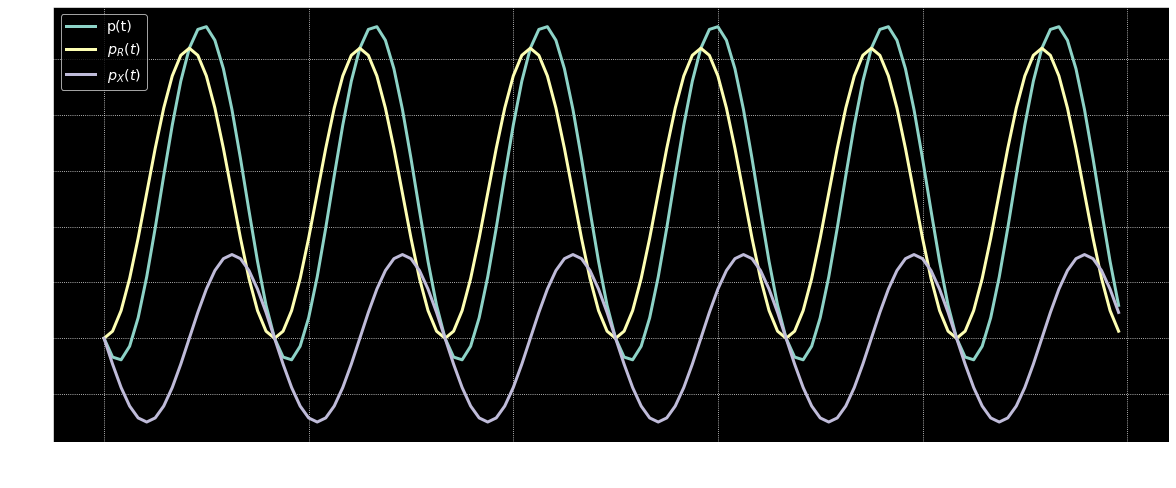

In [0]:
Vm = 2
theta_v = 0
Im = 3
theta_i = -30
T = 0.050
fa = 2400

t,vt,it,pt,et = gera_t_vt_it_pt_et_CA(Vm,theta_v,Im,theta_i,T,fa)
pRt,pXt = gera_pRt_pXt(Vm,theta_v,Im,theta_i,t)

fig, ax = plt.subplots(1,1,figsize=(20, 8))

ax = plot_serie_temporal(ax,t,pt,'p(t)','Tempo (s)',f'Potência (W) - Média = {np.mean(pt):6.4f} W')
ax = plot_serie_temporal(ax,t,pRt,'$p_R(t)$','','')
ax = plot_serie_temporal(ax,t,pXt,'$p_X(t)$','','')

## Conclusão



$p_R(t)$ é a potência entregue a porção resistiva da carga. 

Esse termo é senoidal, possui o dobro da frequência de $v$ e $i$, além de ser sempre positivo. Essa potência é nomeada de **potência ativa**.

$p_X(t)$ é a potência entregue a porção indutiva/capacitiva da carga. 

Esse termo é senoidal, possui o dobro da frequência de $v$ e $i$, mas tem média nula. Essa potência é nomeada de **potência reativa**.

A energia entregue ao equipamento depende somente de $p_R(t)$. Porém, quanto maior a amplitude de $p_X(t)$, menor é o valor médio de $p_R(t)$.

## Desafio

Considere um sistema monofásico CA semelhante ao de uma residência, com $V_m = 311.13 V$ e $\theta_v = 0°$. 

O morador dessa residência colocou uma extensão em uma tomada e ligou 2 equipamentos:

* O primeiro tem impedância $Z_1 = 100 \angle +30°$ Ohms
* O segundo tem impedância $Z_2 = 200 \angle -88°$ Ohms

Plote em um mesmo gráfico a potência consumida por $Z_1$, $Z_2$ e a potência total obtida pela soma desses dois equipamentos. Identifique as curvas respectivamente por p1(t), p2(t) e p(t).

Considere que as grandezas foram amostradas ao longo de 50 ms com uma frequência de 4800 Hz.

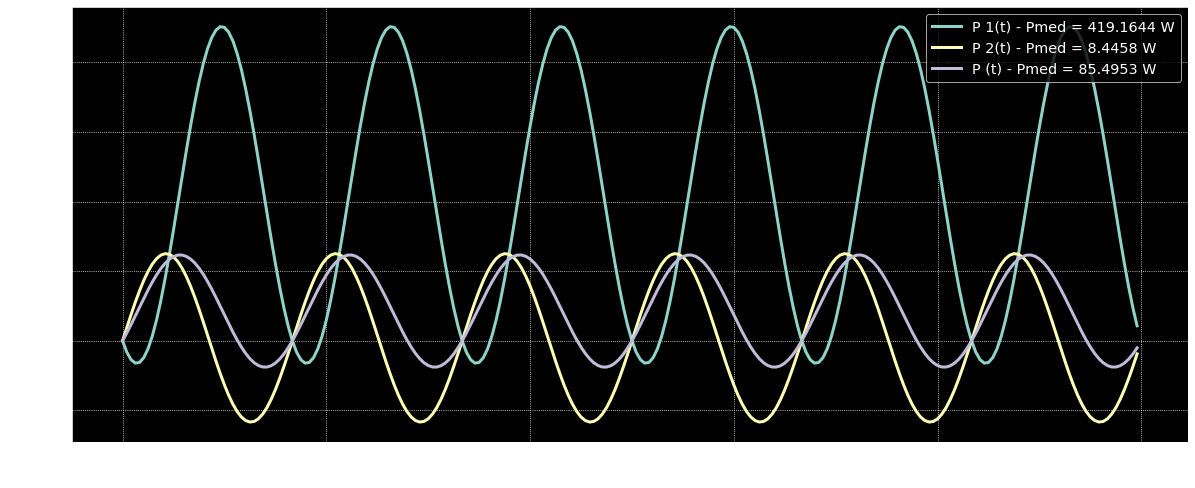

In [0]:
#Entradas
Vm = 311.13
theta_v = 0
Impedancias = [100, 200]
thetas = [30, -88]
T = 0.050
fa = 4800

Im = [] #Lista vazia de correntes
for Impedancia in Impedancias:
  Im.append(Vm / Impedancia) #Preenche a lista

fig, ax = plt.subplots(1,1,figsize=(20, 8)) #Configura o subplots

#Calcula a potencia e plota o grafico das potencias individuais
for item in range(len(Impedancias)):
  theta_i = theta_v - thetas[item]
  t,vt,it,pt,et = gera_t_vt_it_pt_et_CA(Vm,theta_v,Im[item],theta_i,T,fa)
  legenda = f'P{item+1:2d}(t) - Pmed = {np.mean(pt):6.4f} W'
  ax = plot_serie_temporal(ax,t,pt,legenda,'Tempo (s)','Potência (W)')

#Calcula o total
T_impedancia = sum(Impedancias)
T_thetas = sum(thetas)
T_im = Vm / T_impedancia

#Plota o gráfico da potência total
T_theta = theta_v - T_thetas
t,vt,it,pt,et = gera_t_vt_it_pt_et_CA(Vm,theta_v,T_im,T_theta,T,fa)
legenda = f'P (t) - Pmed = {np.mean(pt):6.4f} W'
ax = plot_serie_temporal(ax,t,pt,legenda,'Tempo (s)','Potência (W)')